In [137]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

ModuleNotFoundError: No module named 'Image'

## 1a

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [35]:
df.loc[(df.Year > 2015) & (df.Publisher == "Nintendo") & (df.EU_Sales > df.NA_Sales)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


## 1b

In [42]:
df.loc[df.Year == 2010].groupby("Genre").Global_Sales.sum().idxmax()

'Action'

## 1c

In [57]:
df.groupby("Genre")[["EU_Sales","JP_Sales"]].mean().reset_index().loc[lambda df: df["EU_Sales"] < df["JP_Sales"]].sort_values("JP_Sales")[["Genre","JP_Sales"]].rename(columns={"Genre":"Typ Gry","JP_Sales":"Srednia sprzedaz w Japonii"}).reset_index(drop=True)

,Typ Gry,Srednia sprzedaz w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


## 2

### Oryginalny wykres przedstawiał się tak:

![title](original_plot.png)



Źródło: https://www.youtube.com/watch?v=5CpZwxAgp4Y

Wykres wyświetlony jest Od 31:55 do 32:05.



### Wykres stworzony jako HW2 za pomocą ggplot2:

![title](My_Plot_HW2.png)

Link: https://github.com/alexmal01/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/MalinowskiAleksander/HW2_Raport.pdf

### Tworzenie nowego wykresu

In [59]:
df = pd.DataFrame({'Opis':["Generacja indywidualnego ciepła zeroemisyjnego", "Generacja sieciowego ciepła zeroemisyjnego", "Gospodarka odpadami", "Infrastruktura drogowa", "Infrastruktura wodno - kanalizacyjna", "Odnawialne źródła energii", "Efektywność energetyczna", "Infrastruktura elektroenergetyczna i oświetleniowa", "Infrastruktura sportowa", "Infrastruktura turystyczna", "Rewitalizacja obszarów miejskich", "Infrastruktura edukacyjna", "Infrastruktura społeczna", "Kanalizacja deszczowa"],'val':[19.7, 3.8, 14.1, 471.3, 211.4, 15.2, 32.0, 27.1, 44.2, 57.9, 45.0, 50.0, 9.3, 11.1]})
df

,Opis,val
0,Generacja indywidualnego ciepła zeroemisyjnego,19.7
1,Generacja sieciowego ciepła zeroemisyjnego,3.8
2,Gospodarka odpadami,14.1
3,Infrastruktura drogowa,471.3
4,Infrastruktura wodno - kanalizacyjna,211.4
5,Odnawialne źródła energii,15.2
6,Efektywność energetyczna,32.0
7,Infrastruktura elektroenergetyczna i oświetlen...,27.1
8,Infrastruktura sportowa,44.2
9,Infrastruktura turystyczna,57.9


In [95]:
df.sort_values('val',ascending=False, inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Opis,val
0,Infrastruktura drogowa,471.3
1,Infrastruktura wodno - kanalizacyjna,211.4
2,Infrastruktura turystyczna,57.9
3,Infrastruktura edukacyjna,50.0
4,Rewitalizacja obszarów miejskich,45.0
5,Infrastruktura sportowa,44.2
6,Efektywność energetyczna,32.0
7,Infrastruktura elektroenergetyczna i oświetlen...,27.1
8,Generacja indywidualnego ciepła zeroemisyjnego,19.7
9,Odnawialne źródła energii,15.2


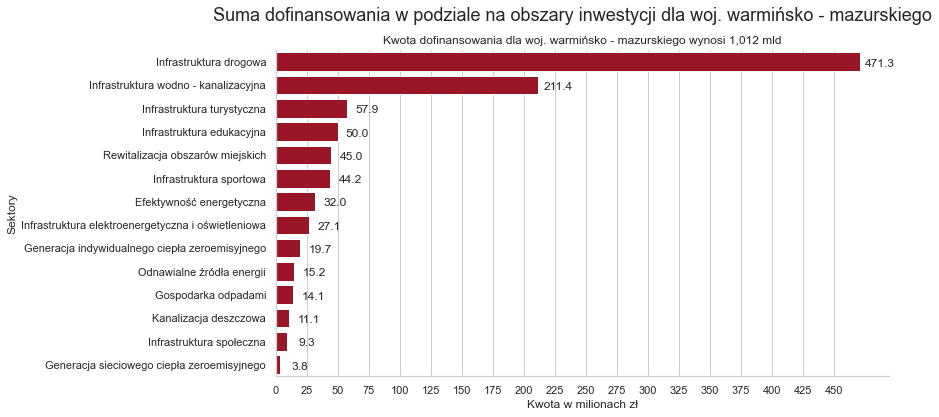

In [140]:
sns.set(rc = {'figure.figsize': (11,6)})
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", rc=custom_params)
ax = sns.barplot(x = df.val, y = df.Opis, color="#AF0016")
plt.suptitle("Suma dofinansowania w podziale na obszary inwestycji dla woj. warmińsko - mazurskiego",fontsize = 18)
ax.set(xlabel = "Kwota w milionach zł", ylabel = "Sektory",title = "Kwota dofinansowania dla woj. warmińsko - mazurskiego wynosi 1,012 mld", xticks = [i for i in range(0,int(max(df.val)),25)])
k = 0
for p in ax.patches:
    _x = p.get_x() + p.get_width() + 16
    _y = p.get_y() + p.get_height() - 0.2
    value = df.val[k]
    k += 1
    ax.text(_x, _y, value, ha="center") 
plt.show()

### Dlaczego ten wykres jest lepszy od R-owego

Moim zdaniem wykresy tworzone w Seabornie już domyślnie wyglądają bardzo dobrze, w przypadku tego konkretnego wykresu zdecydowałem się dodatkowo na parę zmian.

Jedną z nich było usunięcie niepotrzebnych ramek i linii gridu, pozostawiłem tylko to, co niezbędne. Myślę, że wykres prezentuje się czytelniej i estetyczniej. Poza tym zrezygnowałem z "przechylenia" podpisów osi Y, ponieważ nie zwiększało ono w tym przypadku łatwości odczytania informacji.